In [1]:
try:
    output_filepath
except:
    output_filepath = '../data/processed/'

In [2]:
import os
from pathlib import Path

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [3]:
data_path = os.path.join(output_filepath, 'panel_data.parquet')
df_model = pd.read_parquet(data_path)
centralities = ['pagerank', 'gfi', 'bridging', 'favor']

In [4]:
df = df_model.pivot_table(index='year', columns='country', values = 'financial_gfi')

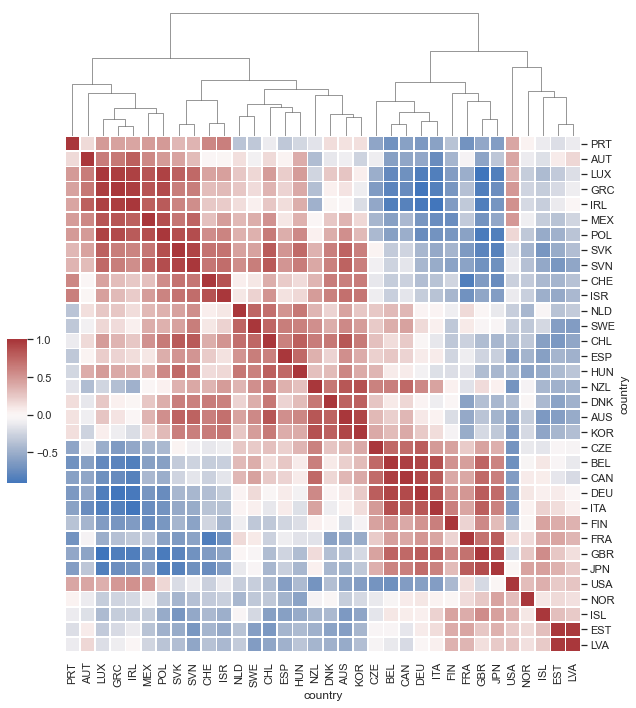

In [5]:
# Draw the full plot
g = sns.clustermap(df.corr().fillna(0), 
                   center=0, 
                   cmap="vlag",
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, 
                   figsize=(9, 10), 
                   xticklabels=True, 
                   yticklabels=True)

g.ax_row_dendrogram.remove()

save_to = os.path.join(Path(output_filepath).parent.parent.resolve(), 'reports', 'figures', 'correlation_structure.png')
plt.savefig(save_to)     